# Exploratory Data Analysis

Use of the clean dataset without dummies.

- Define assumptions
- Check the distribution of data and find out how the features relate to each other
- Identify outliers

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set()

pd.set_option('max_columns',71)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/airbnb_paris_clean.csv')
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
0,within an hour,75-100%,0,72.0,0,Bourse,1,Apartment,Entire home/apt,8,2.0,3.0,Real Bed,256.0,6,30.0,2,1125,284,29,1,0,strict_14_with_grace_period,0,0,0,0,1900
1,within an hour,75-100%,0,1.0,0,Temple,0,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,85.0,1,0.0,1,1125,5,15,0,0,moderate,0,0,0,0,423
2,within an hour,75-100%,0,32.0,0,Bourse,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,88.0,1,0.0,1,1125,341,0,1,0,strict_14_with_grace_period,0,0,0,0,1186
3,within an hour,75-100%,0,1.0,0,Buttes-Montmartre,1,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,92.0,1,0.0,2,6,31,0,0,0,flexible,0,0,0,0,1977
4,within a few hours,75-100%,0,1.0,1,Buttes-Montmartre,1,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,85.0,1,0.0,2,1125,312,4,0,0,flexible,0,0,0,0,1379


In [3]:
df.describe()

,host_is_superhost,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
count,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000,6.542400e+04,65424.000000,65424.000000,65424.000000,65424.0,65424.000000,65424.000000,65424.000000,65424.000000,65424.000000
mean,0.126681,11.358523,0.374373,0.831759,3.048025,1.118573,1.084770,121.628470,1.487237,5.801908,5.234669,8.566805e+02,80.323780,20.013802,0.362451,0.0,0.007505,0.016768,0.217764,0.021674,1728.113888
std,0.332618,78.259334,0.483964,0.374083,1.553882,0.642124,0.985425,225.851833,1.035477,14.410365,44.137089,3.910058e+04,120.721517,40.675817,0.480712,0.0,0.086306,0.128400,0.923470,0.420230,784.682072
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,183.000000
25%,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,60.000000,1.000000,0.000000,1.000000,3.000000e+01,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1210.750000
50%,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,84.000000,1.000000,0.000000,2.000000,1.125000e+03,3.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1792.000000
75%,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,120.000000,2.000000,5.000000,4.000000,1.125000e+03,133.000000,20.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,2275.000000
max,1.000000,1270.000000,1.000000,1.000000,19.000000,50.000000,50.000000,10000.000000,16.000000,271.000000,9999.000000,1.000000e+07,365.000000,844.000000,1.000000,0.0,1.000000,1.000000,21.000000,19.000000,4277.000000


**Insights from describe:**

- Minority of superhost: less than 25% of hosts are superhost.
- Potential outliers on *host_total_listings_count* because of the huge standard deviation and max having 1270 listings (2% of listings own to the same host).
- Surprisingly many host doesn't have a verified account less than 50% of hosts are verified.
- Majority of location are exact, maybe this column is not really significative and could be dropped. 
- In average location can have 3 people, more than 50% only 2. We can identify outliers in accommodates with a location that can accept 19 people. 
- Majority of location have one bathroom and one bedroom which seems correct regarding the average of accommodates. We can also notice outliers with 50 bathrooms and bedrooms which appears to be even unrealistic so maybe wrong data or fake listing. 
- Some location have a price = 0€ per night which should be impossible. There are also outliers because of the huge standard deviation and the maximum price at 10000€ per night. 
- Majority of location accept guest for free. Outliers are also identified in these two columns. 
- Minimum and Maximum nights columns seems to be not so reliable with location having minimum 9999 nights and in average 856 maximum nights. Knowing there is a limitation in France for the number of nights rent per location this could be false data. 
- In average location are available 80 days per year that seems correct in regard of the local legislation (120 days maximum for primary residency and 365 days for private rooms). 
- Majority of location have few reviews (less than 20) and we can see some outliers here as well: can we detect listings with fake comments?)
- Majority of location are not instant bookable with more than 50% that doesn't allow the feature.
- *is_business_travel_ready* seems useless because no locaiton have the feature, we can drop this column. 
- Most of location doesn't require any verification of guests (picture or phone) so these two columns shouldn't have a huge impact. 
- *calculated_host_listings_count_private_rooms* and *calculated_host_listings_count_shared_rooms* give that more than 75% of host doesn't have listings in private rooms or shared_rooms so it may tell us something.
- Finally, in average host are subcribed on airbnb for 1728 days (4,73 years) and this data seems to be normally distributed. 


**TLDR;**
- Minority of hosts are superhost and get their account verified. Also in average, they are subscribed for more than 4 years on airbnb. 
- Most of location can receive 2-3 people, with 1 bathroom and 1 bedroom and accept 1 guest for free.
- We may drop the following columns: *is_business_travel_ready, is_location_exact, minimum_nights, maximum_nights, require_guest_profile_picture, require_guest_phone_verification*
- There are outliers on the dataset and they must be dropped in pre-processing part. 
- Only the *time_since_host* seems to be normally distributed. 

In [4]:
df1 = df.copy()

In [5]:
df1 = df1.drop(columns=['is_business_travel_ready', 'is_location_exact', 'minimum_nights', 
                  'maximum_nights', 'require_guest_profile_picture', 'require_guest_phone_verification'])

In [6]:
df1.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
0,within an hour,75-100%,0,72.0,0,Bourse,Apartment,Entire home/apt,8,2.0,3.0,Real Bed,256.0,6,30.0,284,29,1,strict_14_with_grace_period,0,0,1900
1,within an hour,75-100%,0,1.0,0,Temple,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,85.0,1,0.0,5,15,0,moderate,0,0,423
2,within an hour,75-100%,0,32.0,0,Bourse,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,88.0,1,0.0,341,0,1,strict_14_with_grace_period,0,0,1186
3,within an hour,75-100%,0,1.0,0,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,92.0,1,0.0,31,0,0,flexible,0,0,1977
4,within a few hours,75-100%,0,1.0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,85.0,1,0.0,312,4,0,flexible,0,0,1379


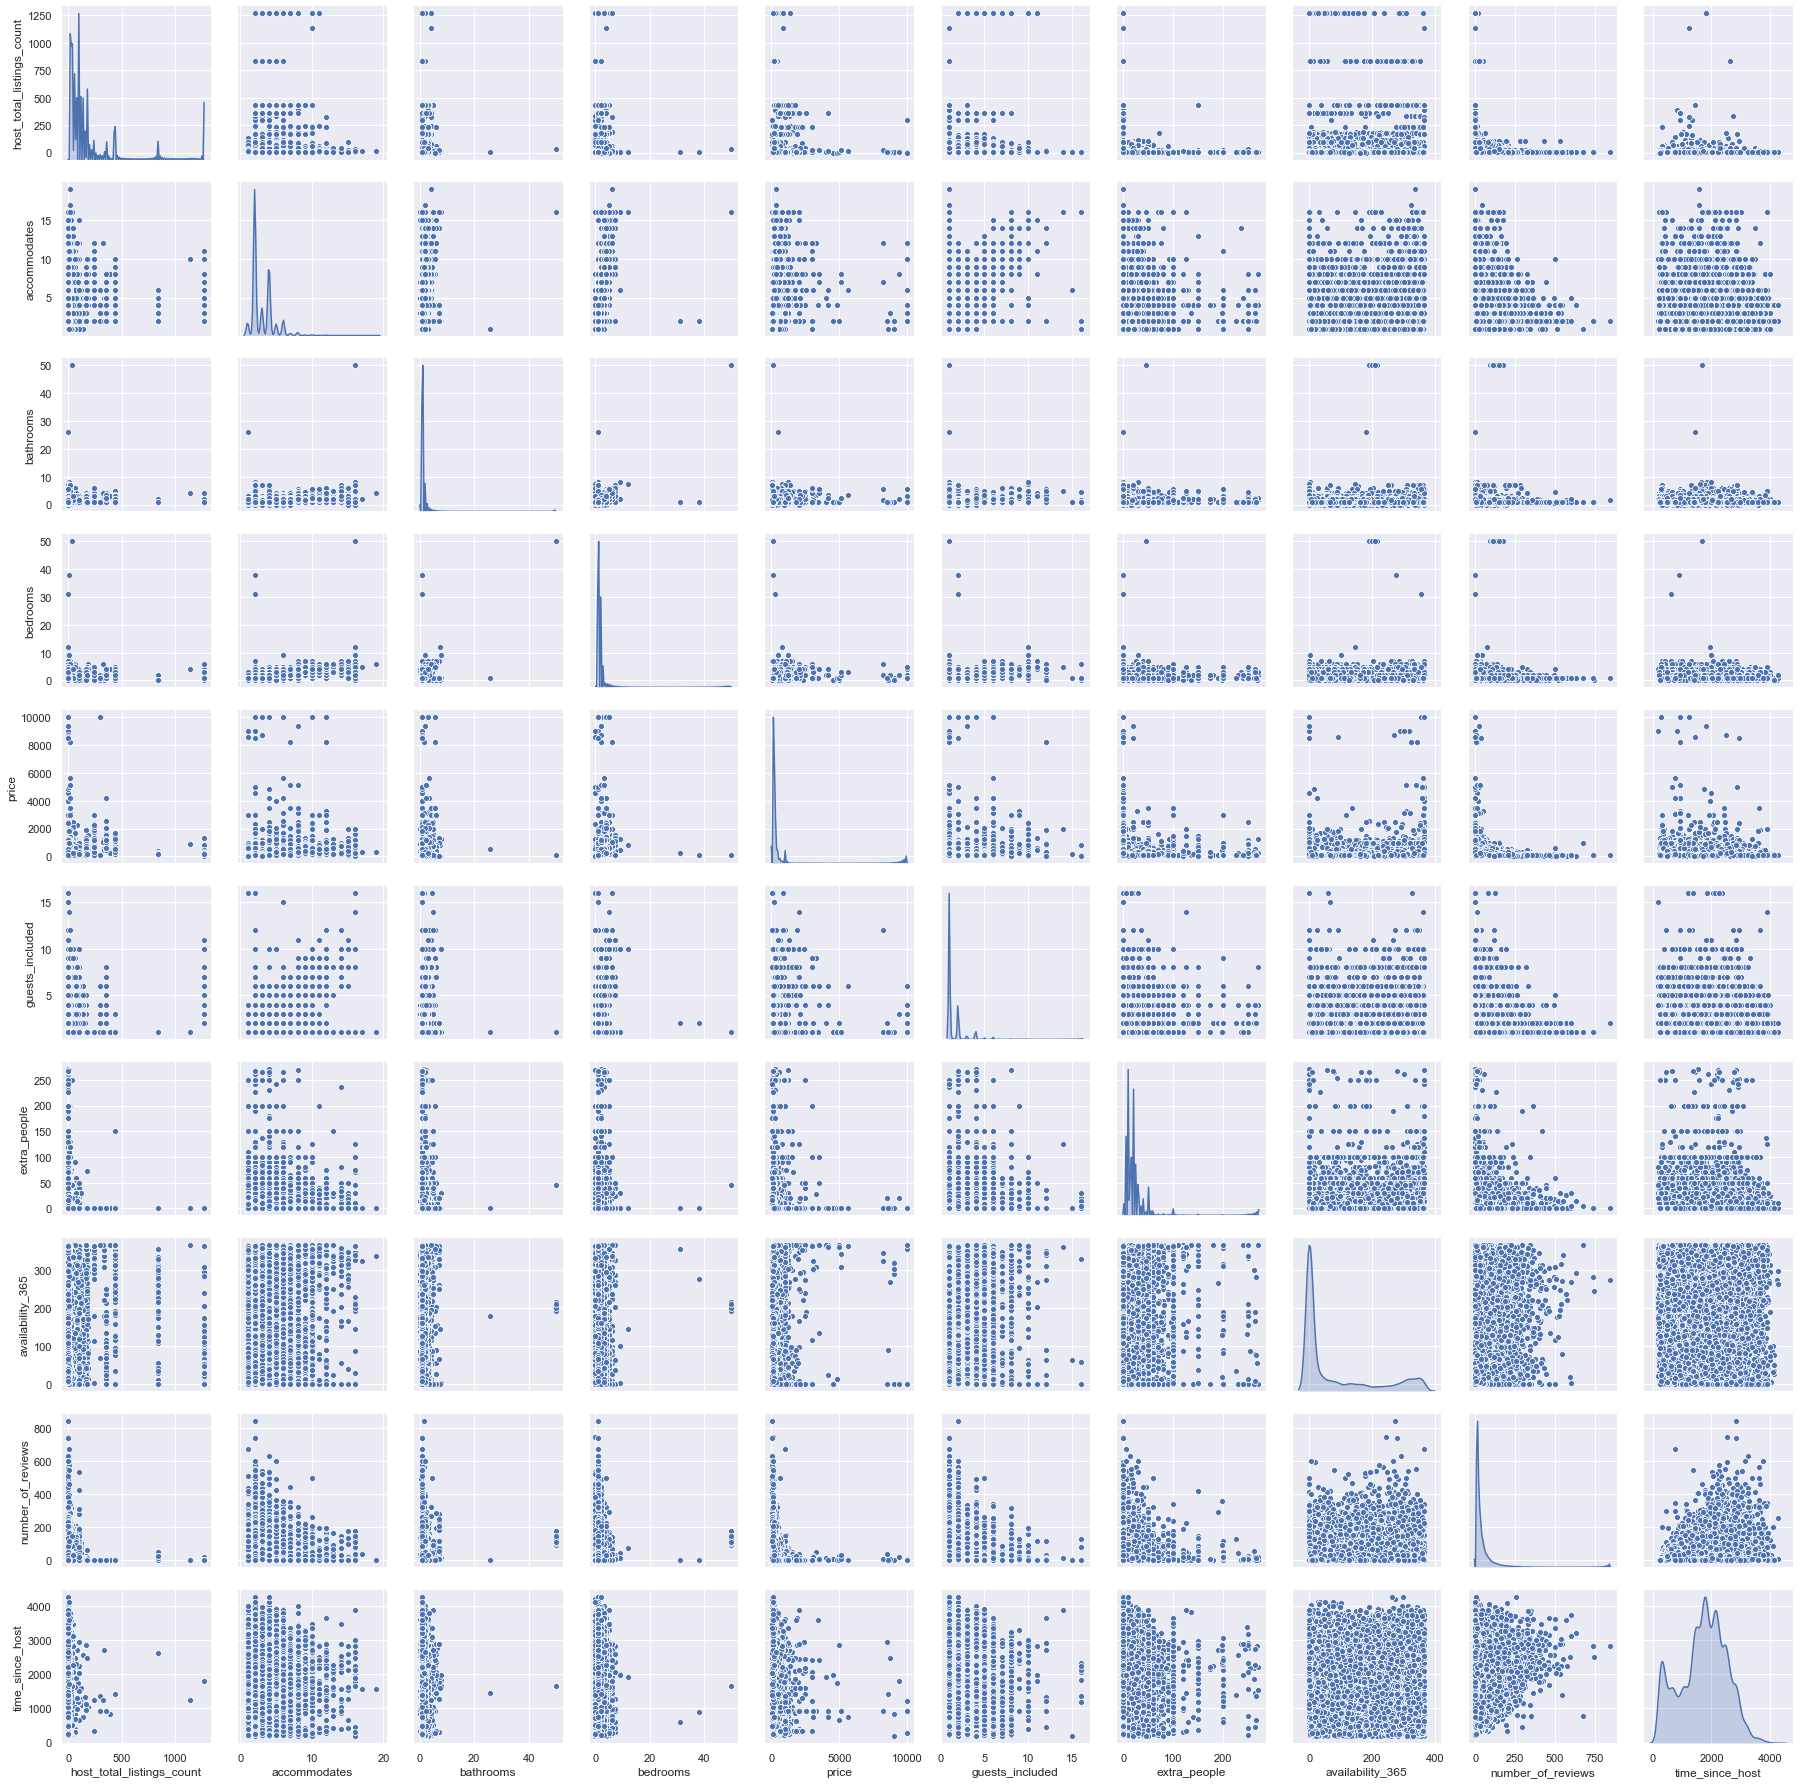

In [7]:
# Checking the relation between numerical variables (excluded 0,1 variables)

sns.pairplot(df1[['host_total_listings_count','accommodates','bathrooms','bedrooms',
                  'price','guests_included','extra_people','availability_365',
                  'number_of_reviews','time_since_host']], kind="scatter", diag_kind='kde')
plt.show()

________________________________________
### Distribution plots

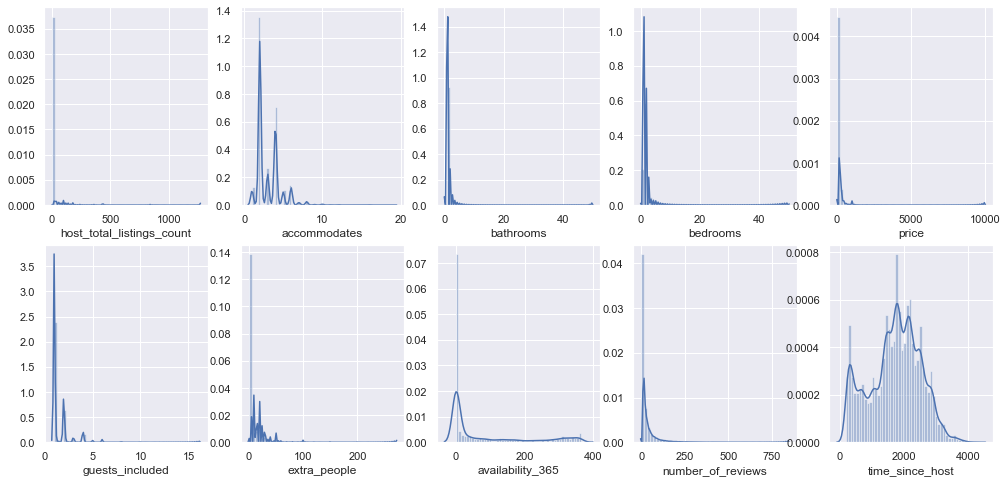

In [8]:
numeric_df = df1[['host_total_listings_count','accommodates','bathrooms','bedrooms',
                  'price','guests_included','extra_people','availability_365',
                  'number_of_reviews','time_since_host']]

fig,axs=plt.subplots(2,5,figsize=(17,8))

for i in range(numeric_df.shape[1]):
    ax = axs[i//5,i%5]
    sns.distplot(numeric_df.iloc[:,i],ax=ax)
plt.show()

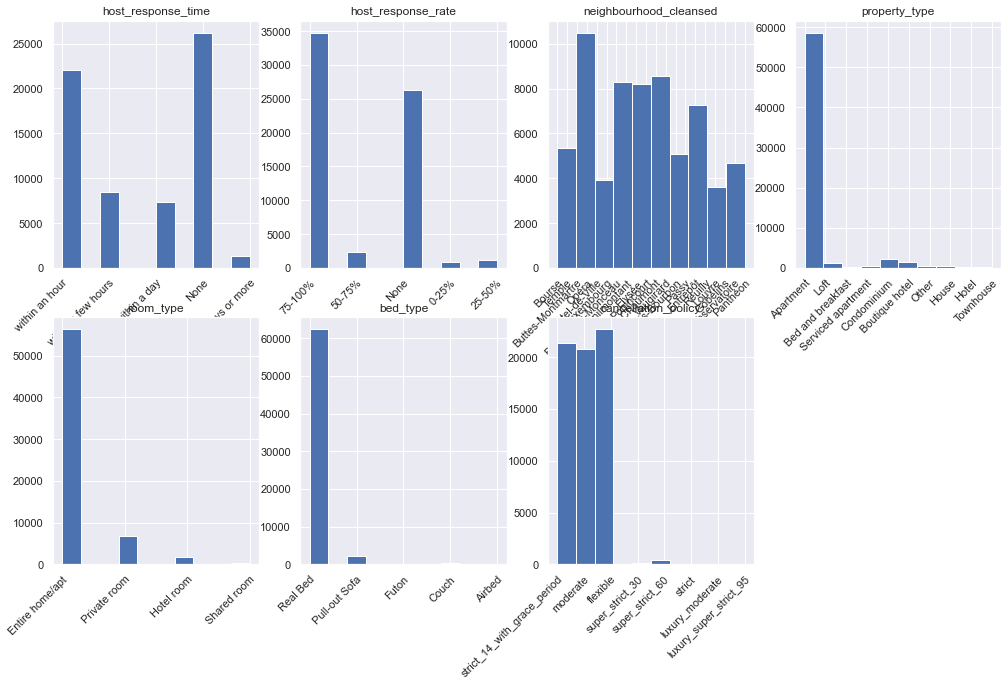

In [33]:
non_numerical_df = df1[df1.columns[df1.dtypes==object]]

fig, axs = plt.subplots(2,4, figsize=(17,10))

for i in range(non_numerical_df.shape[1]):
    ax=axs[i//4,i%4]
    ax.hist(non_numerical_df.iloc[:,i])
    ax.set_title(non_numerical_df.columns[i])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.delaxes(axs[1,3])   
plt.show()

______________________________
### Outliers

In [11]:
df1.groupby('neighbourhood_cleansed')['price'].describe().T

neighbourhood_cleansed,Batignolles-Monceau,Bourse,Buttes-Chaumont,Buttes-Montmartre,Entrepôt,Gobelins,Hôtel-de-Ville,Louvre,Luxembourg,Ménilmontant,Observatoire,Opéra,Palais-Bourbon,Panthéon,Passy,Popincourt,Reuilly,Temple,Vaugirard,Élysée
count,4454.000000,2235.000000,3712.00000,7437.000000,4591.000000,2268.000000,2005.000000,1329.000000,1926.000000,3829.000000,2493.000000,3061.000000,1808.000000,2181.000000,3251.000000,6412.000000,2667.000000,3131.000000,4865.000000,1769.000000
mean,110.597441,148.422371,90.49111,88.933172,102.403616,86.970899,163.007980,189.961625,178.929907,74.495691,106.200562,136.812806,213.559181,133.719395,178.356506,93.441672,96.620922,153.031619,114.970812,239.011871
std,189.522162,180.950363,345.00966,147.204538,98.499637,124.855445,202.815187,360.453056,184.440241,65.122474,224.392624,165.051931,484.897409,140.747331,344.664253,97.923519,283.326591,208.454036,264.657364,305.586097
min,10.000000,19.000000,0.00000,0.000000,9.000000,0.000000,10.000000,9.000000,9.000000,10.000000,0.000000,9.000000,10.000000,10.000000,0.000000,9.000000,0.000000,0.000000,0.000000,9.000000
25%,60.000000,79.000000,49.00000,52.000000,60.000000,50.000000,85.000000,90.000000,85.000000,48.000000,56.000000,69.000000,80.000000,72.000000,72.000000,57.000000,55.000000,80.000000,62.000000,90.000000
50%,80.000000,100.000000,65.00000,70.000000,80.000000,70.000000,120.000000,120.000000,120.000000,63.000000,75.000000,95.000000,120.000000,100.000000,105.000000,75.000000,73.000000,110.000000,85.000000,140.000000
75%,115.000000,159.000000,90.00000,95.000000,110.000000,99.000000,180.000000,200.000000,200.000000,85.000000,100.000000,139.000000,200.000000,150.000000,180.000000,100.000000,100.000000,169.000000,120.000000,250.000000
max,10000.000000,5150.000000,9999.00000,9379.000000,2000.000000,4855.000000,5150.000000,8240.000000,2546.000000,1500.000000,9039.000000,1700.000000,9028.000000,3000.000000,10000.000000,4560.000000,9999.000000,8500.000000,9999.000000,5000.000000


In [12]:
df2 = df1.copy()

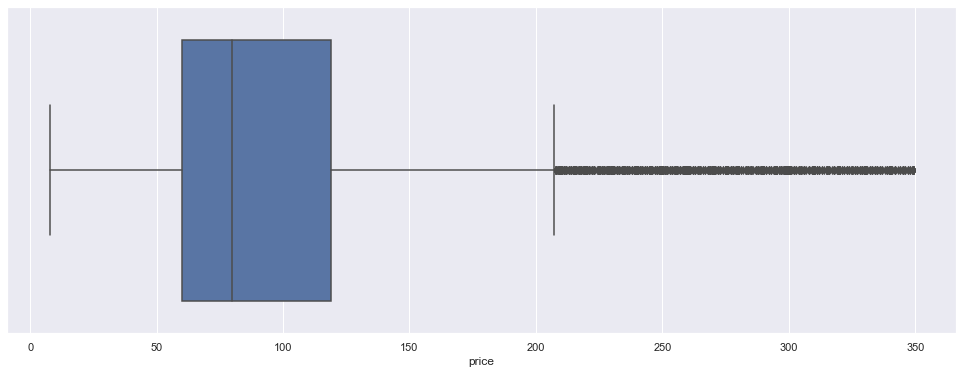

In [13]:
plt.figure(figsize=(17,6))
sns.boxplot(df2[(df2.price>0)&(df2.price<350)].price)
plt.show()

In [14]:
# dropping outliers based on price

df2 = df2[(df2.price>0)&(df2.price<350)]
df2.shape

(62964, 22)

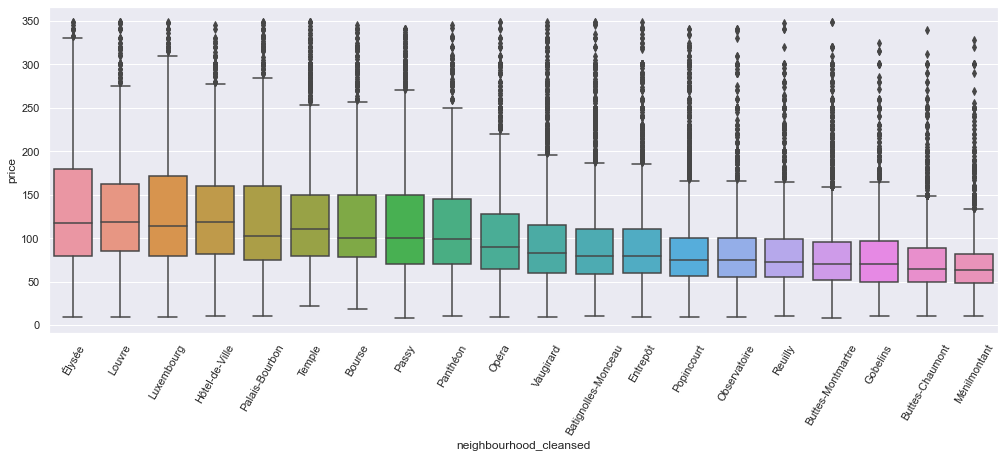

In [15]:
lst_order = df2.groupby('neighbourhood_cleansed').price.agg('mean').sort_values(ascending=False).index

plt.figure(figsize=(17,6))
sns.boxplot(x=df2.neighbourhood_cleansed, y=df2.price, order=lst_order)
plt.xticks(rotation=60)
plt.show()

In [16]:
# Top 5 most expensive neighbourhood

df2.groupby('neighbourhood_cleansed').price.agg('mean').sort_values(ascending=False).head(5)

neighbourhood_cleansed
Élysée            134.579631
Louvre            132.997487
Luxembourg        132.397008
Hôtel-de-Ville    130.919149
Palais-Bourbon    125.640832
Name: price, dtype: float64

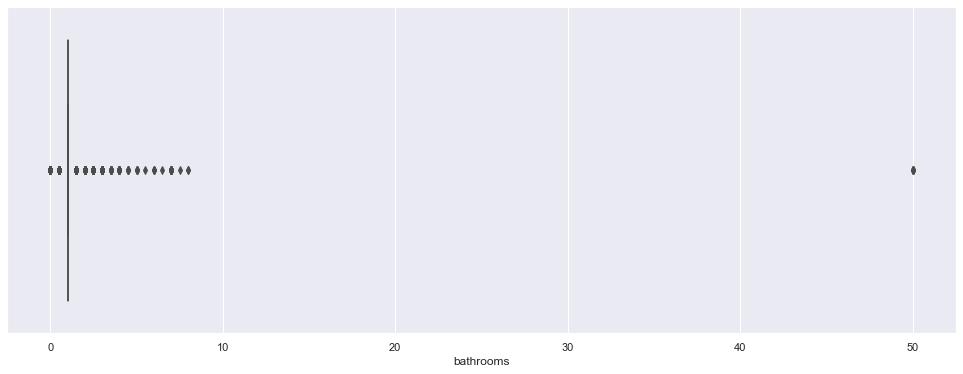

In [17]:
# Checking outliers for bathrooms

plt.figure(figsize=(17,6))
sns.boxplot(df2.bathrooms)
plt.show()

In [18]:
# Dropping all locations with more than 3 bathrooms

bath_outliers = df2[df2.bathrooms>3].index
df2 = df2.drop(index = bath_outliers)
df2.shape

(62885, 22)

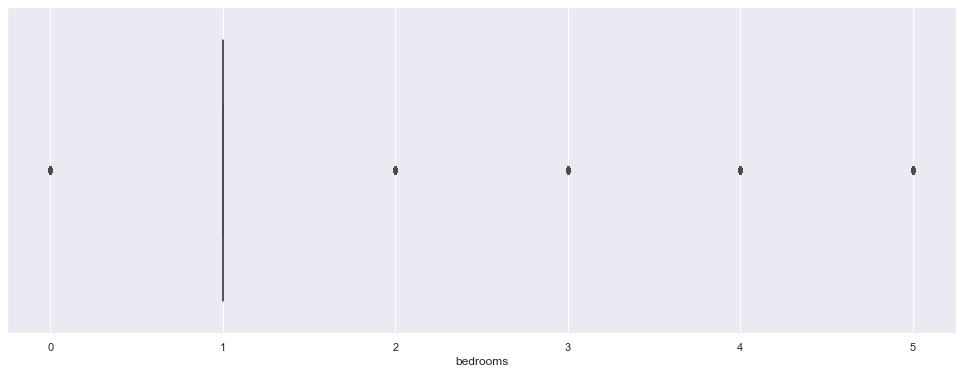

In [19]:
# Checking outliers for bedrooms

plt.figure(figsize=(17,6))
sns.boxplot(df2[df2.bedrooms<6].bedrooms)
plt.show()

In [20]:
# Dropping all locations with more than 4 bedrooms

bedrooms_outliers = df2[df2.bedrooms>4].index
df2 = df2.drop(index = bedrooms_outliers)
df2.shape

(62837, 22)

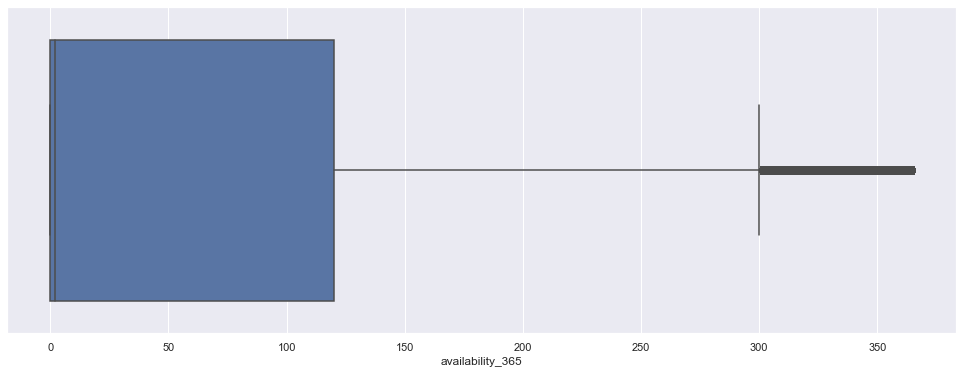

In [21]:
# Checking outliers for availability_365

plt.figure(figsize=(17,6))
sns.boxplot(df2.availability_365)
plt.show()

# ==> availability_365 = 0 would mean that this location all always booked and it can be the case in real life

In [22]:
df2[df2.availability_365>300]

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
2,within an hour,75-100%,0,32.0,0,Bourse,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,88.0,1,0.0,341,0,1,strict_14_with_grace_period,0,0,1186
4,within a few hours,75-100%,0,1.0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,85.0,1,0.0,312,4,0,flexible,0,0,1379
10,within an hour,75-100%,0,62.0,0,Hôtel-de-Ville,Apartment,Entire home/apt,4,1.0,2.0,Real Bed,220.0,1,0.0,365,0,0,strict_14_with_grace_period,0,0,298
11,within a day,75-100%,0,8.0,0,Hôtel-de-Ville,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,96.0,2,5.0,341,0,0,strict_14_with_grace_period,0,0,2881
15,within a few hours,75-100%,0,3.0,0,Temple,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,295.0,2,50.0,342,25,0,strict_14_with_grace_period,0,0,3148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65398,within a day,50-75%,0,1.0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,120.0,2,15.0,352,13,0,moderate,0,0,2849
65403,within a day,75-100%,0,1.0,1,Temple,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,138.0,2,0.0,360,46,0,moderate,0,0,2880
65417,within an hour,75-100%,0,2.0,1,Bourse,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,220.0,1,0.0,365,0,0,flexible,0,0,2544
65418,within a day,75-100%,0,1.0,1,Passy,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,140.0,1,0.0,362,7,0,strict_14_with_grace_period,0,0,2733


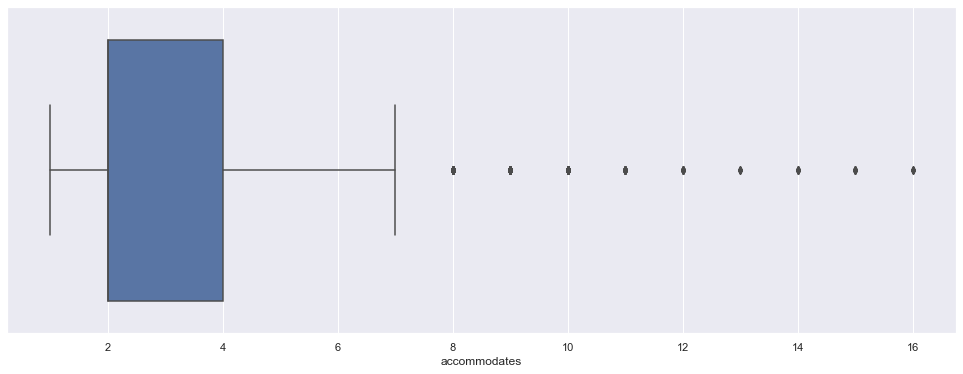

In [23]:
# Checking outliers for accommodates

plt.figure(figsize=(17,6))
sns.boxplot(df2.accommodates)
plt.show()

In [24]:
df2[df2.accommodates>10]

# Location with more than 10 accommodates seems to have realistic data in regards of 
# number of bathrooms and price

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
736,within an hour,75-100%,0,46.0,0,Élysée,Apartment,Entire home/apt,11,2.0,2.0,Real Bed,204.0,1,0.0,325,13,1,super_strict_60,0,0,2199
978,None,None,0,1.0,0,Popincourt,Loft,Entire home/apt,15,1.5,3.0,Real Bed,211.0,6,30.0,0,100,0,strict_14_with_grace_period,0,0,2589
1394,within an hour,75-100%,0,19.0,1,Temple,Apartment,Entire home/apt,11,2.0,3.0,Real Bed,144.0,1,0.0,321,3,1,super_strict_60,0,0,1563
1579,within an hour,75-100%,0,19.0,1,Temple,Apartment,Entire home/apt,15,2.0,4.0,Real Bed,175.0,1,0.0,310,7,1,super_strict_60,0,0,1563
2027,within an hour,75-100%,0,46.0,0,Élysée,Apartment,Entire home/apt,11,1.0,3.0,Real Bed,228.0,1,0.0,0,3,1,super_strict_60,0,0,2199
4673,within an hour,75-100%,0,19.0,1,Élysée,Apartment,Entire home/apt,11,2.0,3.0,Real Bed,212.0,1,0.0,330,49,1,super_strict_60,0,0,1563
5475,within an hour,75-100%,0,19.0,1,Temple,Apartment,Entire home/apt,15,2.0,4.0,Real Bed,159.0,1,0.0,331,26,1,super_strict_60,0,0,1563
5792,within an hour,75-100%,0,19.0,1,Temple,Apartment,Entire home/apt,11,2.0,2.0,Real Bed,159.0,1,0.0,333,5,1,super_strict_60,0,0,1563
6234,within an hour,75-100%,0,19.0,1,Élysée,Apartment,Entire home/apt,13,2.0,3.0,Real Bed,265.0,1,0.0,322,52,1,super_strict_60,0,0,1563
6862,within an hour,75-100%,0,2.0,1,Élysée,Loft,Entire home/apt,16,0.0,0.0,Real Bed,200.0,1,0.0,365,0,0,flexible,0,0,2277


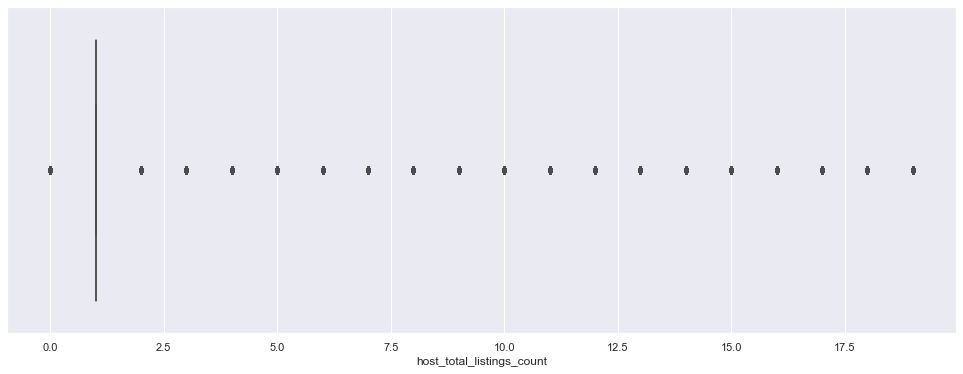

In [25]:
# Checking outliers for host_total_listings_count

""" 
This column doesn't seems releveant because majority of people have only 1 listing.
Also, people with 0 listing means there is something wrong with the data. 
"""

plt.figure(figsize=(17,6))
sns.boxplot(df2[df2.host_total_listings_count<20].host_total_listings_count)
plt.show()

In [26]:
df2[df2.host_total_listings_count==0]

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
22,within an hour,75-100%,1,0.0,0,Temple,Condominium,Entire home/apt,4,1.0,1.0,Real Bed,115.0,1,0.0,138,10,1,strict_14_with_grace_period,0,0,838
30,within an hour,75-100%,0,0.0,0,Opéra,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,110.0,1,0.0,303,7,0,flexible,0,0,348
58,within a few hours,75-100%,0,0.0,0,Popincourt,Other,Entire home/apt,2,1.0,0.0,Real Bed,45.0,1,0.0,7,5,0,flexible,0,0,283
64,within a few hours,75-100%,0,0.0,0,Temple,Apartment,Entire home/apt,3,1.0,2.0,Real Bed,120.0,1,10.0,0,1,0,strict_14_with_grace_period,0,0,1865
78,within an hour,75-100%,0,0.0,1,Popincourt,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,80.0,1,0.0,36,0,0,flexible,0,0,2390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65352,within an hour,75-100%,0,0.0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.5,1.0,Real Bed,120.0,1,20.0,21,10,0,strict_14_with_grace_period,0,0,2764
65353,within a day,50-75%,0,0.0,0,Ménilmontant,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,60.0,1,0.0,180,4,1,flexible,0,0,1492
65393,within an hour,75-100%,0,0.0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,70.0,1,0.0,5,9,0,flexible,0,0,709
65407,within an hour,75-100%,0,0.0,1,Temple,Apartment,Entire home/apt,4,1.0,2.0,Real Bed,180.0,1,0.0,160,0,1,strict_14_with_grace_period,0,0,220


In [27]:
# Dropping this column because it seems pointless to keep

df2 = df2.drop('host_total_listings_count',axis=1)
df2.shape

(62837, 21)

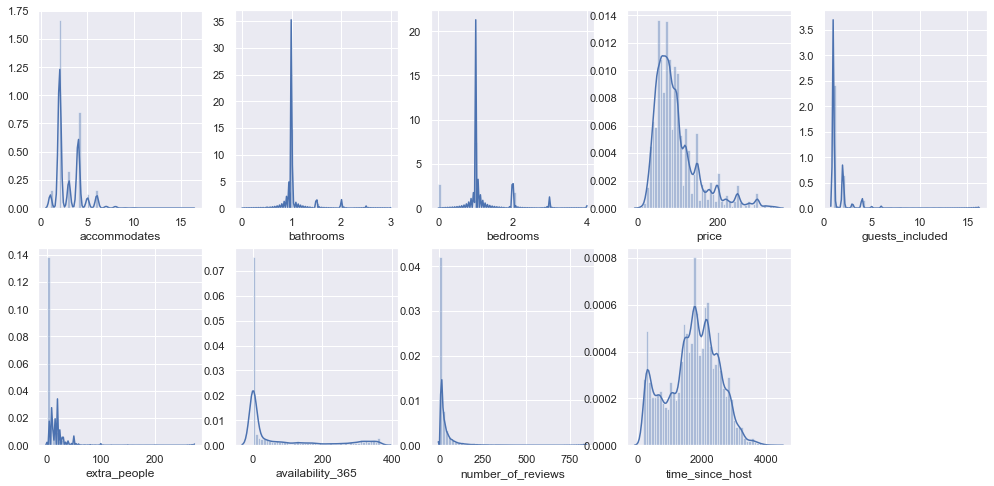

In [31]:
numeric_df = df2[['accommodates','bathrooms','bedrooms',
                  'price','guests_included','extra_people','availability_365',
                  'number_of_reviews','time_since_host']]

fig,axs=plt.subplots(2,5,figsize=(17,8))

for i in range(numeric_df.shape[1]):
    ax = axs[i//5,i%5]
    sns.distplot(numeric_df.iloc[:,i],ax=ax)
    
fig.delaxes(axs[1,4])
plt.show()

____________________________________
### Saving new dataframe

In [35]:
# Saving csv without dummies

df2.to_csv('../data/airbnb_paris_clean_wo_dummies.csv',index=False)

In [ ]:
# Getting Dummies for feature engineering
df3 = df2.copy()
df3 = pd.get_dummies(df3,drop_first=True)
df3.shape

In [ ]:
# Saving the csv with dummies

df3.to_csv('../data/airbnb_paris_clean_dummies.csv',index=False)

### Possible improvements 

- Compare each feature with the price (regplot)
- Other analysis
- More precise outlier cleaning by using z-score or IQR